# ML Exercise 1: Linear Regression

This notebook is to help you get started on Exercise 1 for Project 4 on Machine Learning.

Exercise 1 covers the material we discussed in the Intro to ML presentation which you can find [on this Canvas page](https://canvas.tufts.edu/courses/62563/pages/intro-to-ml-slides-and-exercise-materials?module_item_id=1651708).

In this exercise your group is being asked to implement a linear regression model.  

The task is to estimate profits for opening a new food truck based on the population of the city.  You are provided data for the profit for past trucks along with the population of the cities in which they operated.

The objectives for this exercise is to:
* Import data, text file with (x,y) pairs
* Create arrays X, Y, theta
* [Result 1] Calculate theta using Normal Equation
* [Result 2] Plot data points and model curve
* [Result 3] Implement gradient solver - compare to Normal Equation solution
* [Result 4] Plot loss and gradient norm vs. iteration step
* [Optional Study] Plot path of 2d parameter values during gradient descent

## 1.1 Loading the Data

You can download the data the following GoogleDrive [link](https://drive.google.com/file/d/1Duglp2NZQQWJ4j1iUPZmAAcFKEUT0Jvi/view?usp=sharing).

In the rest that follows, we assume that the file, `ex1data.txt`, has been uploaded into `/content/drive/sample_data/`.

The data is in a very simple CSV format.

The first column of data is the population in 10K people.  The second column is the profit in 10K dollars.


Here is an example of the first bit of the file:

```
6.1101,17.592
5.5277,9.1302
8.5186,13.662
7.0032,11.854
5.8598,6.8233
8.3829,11.886
7.4764,4.3483
8.5781,12
6.4862,6.5987
5.0546,3.8166
...
```


Import the packages.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import torch
%matplotlib inline

In [6]:
# we use numpy's import function
from numpy import genfromtxt
my_data = genfromtxt('ex1data1.txt', delimiter=',')

# when using numpy (or torch arrays), checking the shape will be important
# many operations will have requirements involving the shape of input arrays
# (e.g. matrix multiplication requires that the number of dimenions is 2).
print("shape of numpy array (expected to be (97,2)): ",my_data.shape)
print("dimension of array: ",len(my_data.shape))

shape of numpy array (expected to be (97,2)):  (97, 2)
dimension of array:  2


## 1.2 Slicing an array

Libraries like numpy and torch provide ways to isolate or 'slice' portions of an array.

The following is an example of slicing out the first and second columns of our data array in order to isolate the population and profit data and make a 2D scatter plot.

In [8]:
# Example of slicing an array

# if you want only the population data column in the array, we can slice it out
population_data = my_data[:,0] # take slice of array involving all rows (':') and only the 0-th column
print("population_data.shape=",population_data.shape) # should be (97,) which is a one-dimensional array

# likewise, this is how you get the profit values, which is the 1-indexed column
profit_data = my_data[:,1]
print("profit_data.shape=",profit_data.shape)

population_data.shape= (97,)
profit_data.shape= (97,)


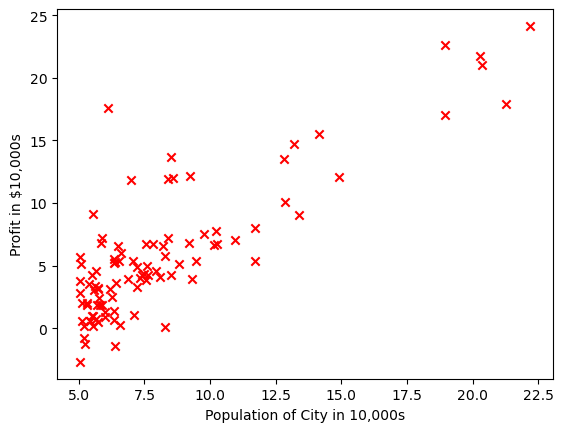

In [9]:
# visualizing the data
plt.scatter(population_data, profit_data, marker='x', c='r')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

## 1.3 Manipulating array dimensions

Often times we need to manipulate the shape and/or the number of dimensions of an array. This might involve need to expand or contract the dimension of the array without changing the number of actual elements in the array.

In [12]:
# Some numpy functions for creating and manipulating arrays

# rename the input 1D arrays with something shorter
x = population_data
y_1d = profit_data
print(x.shape)
print(y_1d.shape)

# creating arrays with a shape
# making 2D array of zeros
z_zeros = np.zeros( (x.shape[0],1) )
print(z_zeros.shape)
# making array of ones
z_ones = np.ones( (x.shape[0],1) )
print(z_ones.shape)



# for example, our slices were 1D (97,)
# but in lecture, the talked about 2D matrices,
# so we need to "expand" dimensions and turn (97,) into (97,1) [column vector] or (1,97) [row vector]
x_col1 = np.expand_dims(x, axis=1) # add a dimension of size 1 as a new trailing dimension: (97,) -> (97,1)
x_col2 = x[:,np.newaxis] # add a dimension of size 1 as a new trailing dimension: (97,) -> (97,1)
x_col3 = x.reshape(-1,1) # add a dimension of size 1 as a new trailing dimension: (97,) -> (97,1). the '-1' represents the current dimensions
print("x_col.shape=",x_col1.shape)
print("x_col.shape=",x_col2.shape)
print("x_col.shape=",x_col3.shape)

x_row1 = x[np.newaxis,:] # add a dimension of size 1 as a new leading dimension: (97,) -> (1,97)
x_row2 = np.expand_dims(x, axis=0) # add a dimension of size 1 as a new leading dimension: (97,) -> (1,97)
x_row3 = x.reshape(1,-1) # add a dimension of size 1 as a new leading dimension: (97,) -> (1,97). the '-1' represents the current dimensions
print("x_row.shape=",x_row1.shape)
print("x_row.shape=",x_row2.shape)
print("x_row.shape=",x_row3.shape)

Y = y_1d.reshape(-1,1) # 2D column vector
print("Y.shape=",Y.shape)

(97,)
(97,)
(97, 1)
(97, 1)
x_col.shape= (97, 1)
x_col.shape= (97, 1)
x_col.shape= (97, 1)
x_row.shape= (1, 97)
x_row.shape= (1, 97)
x_row.shape= (1, 97)
Y.shape= (97, 1)


## 1.4  Collating data by concatenating arrays

Sometimes we want to add a new colum, or append a bunch of rows of an array.
For example, one way to complete this exercise requires us to combine many col vectors of [ [1], [x_i] ] into [ [1, 1, 1, ... ], [x_0, x_1, x_2, ...]]

The end result is a matrix with two rows and number of columsn equal to the number of training examples.

In [13]:
# one command is np.concat (for concatenate)
print(z_ones.T.shape)
print(x.reshape(1,-1).shape)
X = np.concat( [z_ones.T,x.reshape(1,-1)], axis=0 )
print(X.shape)
#print(X)

# see also
# np.stack: https://numpy.org/doc/2.1/reference/generated/numpy.stack.html
# np.column_stack
# np.vstack
# np.hstack
# np.dstack


(1, 97)
(1, 97)
(2, 97)


In [14]:
# create randomly initialized theta
theta = np.random.random((2,1))
print(theta.shape)
print(theta)


(2, 1)
[[0.90224362]
 [0.81674122]]


In [15]:
# matrix multiplication
# here use the matrix multiply operator for two arrays, A@B
# see also np.matmul
# Note: this is different from element-wise multiplication, which is A*B

# prediction for each point
def predict(X_, th_):
  return X_.T@th_

y_pred = predict(X, theta)
print(y_pred.shape)

(97, 1)


In [16]:
Y = Y.reshape(-1,1)
print(Y.shape)
err = y_pred-Y

(97, 1)


In [17]:
def calc_loss( X_train, Y_true, th ):
  y_pred = predict(X_train,th)
  err = y_pred-Y_true
  loss = 0.5*np.mean(np.pow(err,2))
  return loss

## 1.5 Taking advantage of auto-differentation library

Libraries like pytorch, tensorflow, JAX (and others) are built to help us calculate the (partial) derivatives of our function with respect to any input.

The examples below are for pytorch.

We have to convert from numpy arrays into torch 'tensors'.

In [18]:
# take advantage of auto-diff library, pytorch

# first change numpy arrays into torch arrays
X_t = torch.from_numpy(X)
Y_t = torch.from_numpy(Y)

th_t = torch.tensor(theta, requires_grad=True)
# the requires_grad flag tells pytorch to keep track of certain quantities when this object is used in a calculation.
# The quantities are meant to help us calculate derivatives respect to this parameter.

print(X_t.shape)
print(Y_t.shape)
print(th_t.shape)

torch.Size([2, 97])
torch.Size([97, 1])
torch.Size([2, 1])


In [19]:
# torch has similar functions for array as numpy -- with some even sharing the same name

def predict_torch(X_, th_):
  return torch.matmul(X_.T,th_)

def calc_loss_torch( X_train, Y_true, th ):
  y_pred = predict_torch(X_train,th)
  loss = 0.5*torch.mean(torch.pow(y_pred-Y_true,2))
  return loss

# try it out
loss = calc_loss_torch(X_t, Y_t, th_t)
print(loss)

tensor(7.0185, dtype=torch.float64, grad_fn=<MulBackward0>)


In [20]:
# Using backpropagation to calculate the gradiant
# to get gradients, we must calculate the loss first
loss = calc_loss_torch(X_t, Y_t, th_t)

# now we run the backward method on the output tensor
loss.backward()

# after calling backward, there are gradients for the loss function:
# shape (2,1)
# :  th_t.grad[0] # dL/d(theta_0)
# :  th_t.grad[1] $ dL/d(theta_1)
print(th_t.grad)

tensor([[1.7276],
        [8.5192]], dtype=torch.float64)


In [21]:
# use normal equation to calculate parameter values with minimum loss

In [ ]:
# implement gradient descent loop
# compare result with normal equation
# what is the effect of the learning rate?
# how many steps does it take to get close to the true solution.



initial theta: 
[[0.97144554]
 [0.09498507]]
Final answer: 
tensor([[-3.8738],
        [ 1.1908]], dtype=torch.float64, requires_grad=True)
Compare to normal equation answer: 
[[-3.89578088]
 [ 1.19303364]]


In [22]:
# make line plot showing parameter values as a function of time steps
# try for different learning rates

In [23]:
# make plot of loss vs iteration


In [24]:
# compare fit result(s) with data


In [25]:
# compare whitened and not-whitened data
# for that we need to calcate summary stats such as the mean and subtract it out

# both numpy and torch have functions to calculate summary statistics
print(X.shape)
X_mean = np.mean(X, axis=1, keepdims=False)
print(X_mean.shape)
print(X_mean)

(2, 97)
(2,)
[1.     8.1598]


## Broadcasting rules/Data whitening

You can perform operations like element-wise addition or multiplication on arrays of different size as long as they follow certain 'broadcasting' rules.

As a concrete example, to whiten our data, which often helps make gradient descent more efficient, we want to subtract the same mean from every data point.  It would also be nice to avoid making an array where the value of the mean repeats across the array.

Instead we can do the following.

See numpy broadcasting rules at this [link](https://numpy.org/doc/stable/user/basics.broadcasting.html).

In [26]:
x_mean = X_mean[1]
X_centered = np.ones( X.shape )

# we only subtract the second row, which has the data values. top row is still ones.
# the right hand side is (97,) - (1,)
# but the broadcast rules stipulate that the one value will be applied to every element of the first array
# broadcast rules can be tricky
# and making use of them correctly can make working with numpy and torch arrays a little clunky
# but the pay off is the auto-diff
X_centered[1,:] = X[1,:]-X_mean[1]

print(X_centered.shape)

# also we need to scale all the data points by the variance
x_var = np.var(X_centered, axis=1, keepdims=False)
print(x_var.shape)
print(x_var)

# "whitened array"
X_centered[1,:] /= x_var[1]
print(X_centered)

(2, 97)
(2,)
[ 0.         14.82160678]
[[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.        